<img src = "http://www.ensam-umi.ac.ma/wp-content/uploads/2020/02/LOGO_ENSAM.png" alt ="ENSAM-LOGO" style = "width : 800px;">

# Student Performance | Achraf FAYTOUT

<html>
    <p style='background:#1F4E79; color:#ED7D31; font-size:20px; padding:10px;'><b>OBJECTIF</b></p>
</html>

* **DANS CE Notebook, NOUS ANALYSERONS LES PERFORMANCES DES ÉLÈVES DANS LES EXAMENS EN FONCTION DE DIVERSES FEATURES TELQUE LE SEXE, L’ÉTAT DES PRÉPARATIONS, ...**

<html>
    <p style='background:#1F4E79; color:#ED7D31; font-size:20px; padding:10px;'><b>DATASET</b></p>
</html>

* **GENDER : le sexe des étudiants**

* **State : l'état auquelle ils appartiennent**

* **PARENTAL LEVEL OF EDUCATION : le niveau educationnel des parents**

* **LUNCH : Type du déjeuner**

* **TEST PREPARATION COURSE : niveau de préparation à l'examen**

* **MATH,READING AND WRITING SCORE : les notes des étudiants en trois matières principales**

In [48]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import seaborn as sns
from folium.plugins import MarkerCluster
import folium
from folium import plugins
import scipy.stats as stat
import warnings

sns.set_style('darkgrid')

In [49]:
df = pd.read_excel('..\PEtudiant.xlsx')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 11 columns


In [50]:
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,State,gcode,lat,long
0,female,bachelor's degree,standard,none,NaN,72.0,74.0,California,"California, United States",36.701463,-118.755997
1,female,some college,standard,completed,69.0,90.0,88.0,Texas,"Texas, United States",31.263890,-98.545612
2,female,master's degree,standard,none,90.0,95.0,93.0,California,"California, United States",36.701463,-118.755997
3,male,associate's degree,free/reduced,none,47.0,57.0,44.0,Minnesota,"Minnesota, United States",45.989659,-94.611329
4,male,some college,standard,none,76.0,78.0,75.0,Texas,"Texas, United States",31.263890,-98.545612


In [51]:
print("===== the names of the Columns in our dataset are =====")
print(" ")
print(list(df.columns))

===== the names of the Columns in our dataset are =====
 
['gender', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'State', 'gcode', 'lat', 'long']


In [52]:
print("===== Description of continuous features =====")
cols = ['lat', 'long', 'gcode']
df.drop(cols, axis = 1).describe()

===== Description of continuous features =====


,math score,reading score,writing score
count,998.000000,998.000000,999.000000
mean,66.080160,69.177355,68.046046
std,15.176844,14.611917,15.201185
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.500000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [53]:
print("===== Information about dataset =====")
print("  ")
print(df.info())

===== Information about dataset =====
  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       999 non-null    object 
 1   parental level of education  998 non-null    object 
 2   lunch                        999 non-null    object 
 3   test preparation course      1000 non-null   object 
 4   math score                   998 non-null    float64
 5   reading score                998 non-null    float64
 6   writing score                999 non-null    float64
 7   State                        1000 non-null   object 
 8   gcode                        1000 non-null   object 
 9   lat                          1000 non-null   float64
 10  long                         1000 non-null   float64
dtypes: float64(5), object(6)
memory usage: 86.1+ KB
None


* **On a 5 categorical features et 3 continus features dans notre  data** 
* **Elles existent des valeurs 'Nan' dans notre dataSet**

In [54]:
df.duplicated().tolist() == [False for i in range(len(df.duplicated().tolist()))] #check if there is any duplicated rows

True

* **On n'a pas de lignes dupiquées!!**

<html>
    <p style='background:#1F4E79; color:#ED7D31; font-size:20px; padding:10px;'><b>VISUALISATION DES DONNÉES</b></p>
</html>

<html>
    <p style='background:white; color:#1F4E79; font-size:20px; padding:10px;border:5px #1F4E79 solid'><b>les données non-uniques correspondant à chaque feature</b></p>
</html>

gender                          2
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
State                           5
gcode                           5
lat                             5
long                            5
dtype: int64

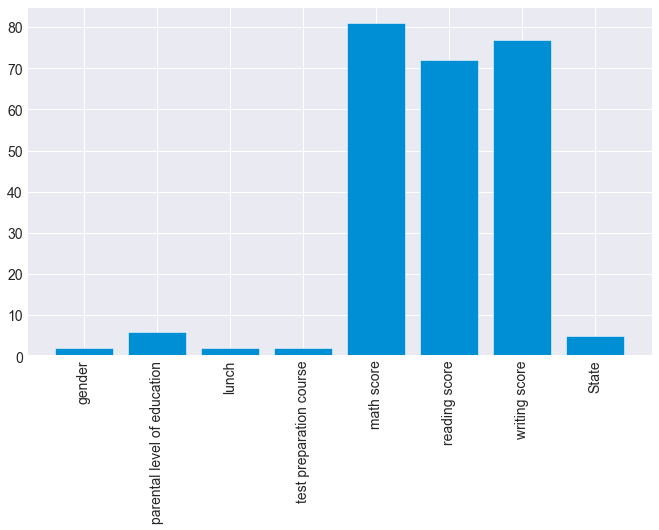

In [55]:
df_temp = df.drop(cols, axis = 1)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.bar(df_temp.columns,df_temp.nunique());
df.nunique()

<html>
    <p style='background:white; color:#1F4E79; font-size:20px; padding:10px;border:5px #1F4E79 solid'><b>Nombre d'étudiants pris selon l'état</b></p>
</html>

In [56]:
my_map = folium.Map(location=(40.104087829589844,-95.77576446533203), zoom_start=4)

In [57]:
marker_cluster = MarkerCluster().add_to(my_map)

for index, row in df.iterrows():
    folium.Marker(location=(row['lat'],row['long'])).add_to(marker_cluster)

display(my_map)

* **la majorité des étudiants habite à Texas state**

In [58]:
df=df.drop(['gcode','lat','long'],axis=1) # drope unuseful columns

<html>
    <p style='background:white; color:#1F4E79; font-size:20px; padding:10px;border:5px #1F4E79 solid'><b>Effectif Homme/Femme</b></p>
</html>

In [59]:
gender_counts = df['gender'].value_counts()
print (gender_counts)

female    517
male      482
Name: gender, dtype: int64


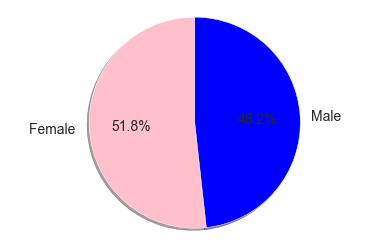

In [60]:
labels = 'Female ', 'Male'
sizes = [517, 482]
colors=['pink','blue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

* **On a deux populations presque de meme taille.** 

<html>
    <p style='background:white; color:#1F4E79; font-size:20px; padding:10px;border:5px #1F4E79 solid'><b>la corrélation entre les 3 features numriques</b></p>
</html>

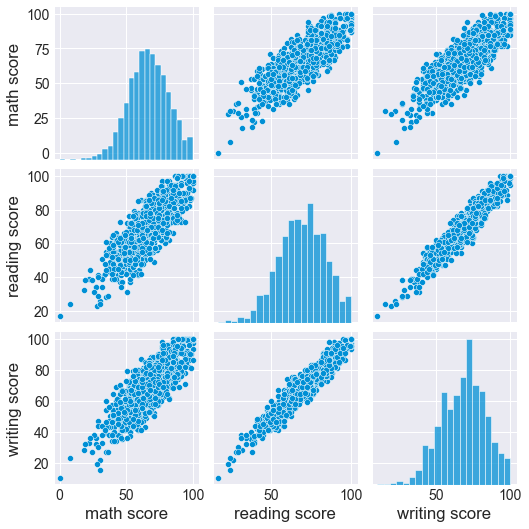

In [61]:
sns.pairplot(df)
plt.show()

* **On constate clairemnt des corrélations entre les trois features** 

<html>
    <p style='background:white; color:#1F4E79; font-size:20px; padding:10px;border:5px #1F4E79 solid'><b>HeatMap</b></p>
</html>

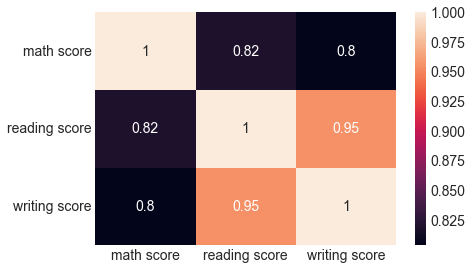

In [62]:
sns.heatmap(df.corr(),annot=True);


* **Une forte corrélation entre "writing score" et "reading score" alors on peut certainement les fusionner par la suite en un seul feature**

<html>
    <p style='background:white; color:#1F4E79; font-size:20px; padding:10px;border:5px #1F4E79 solid'><b>Les notes selon le niveau educationnel parental </b></p>
</html>

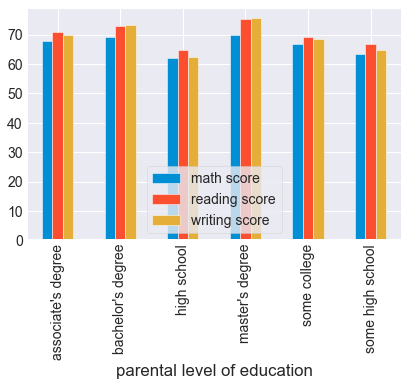

In [63]:
df.groupby(["parental level of education"]).mean().plot.bar()
plt.show()

* **les étudiants ayant des parents avec "master's degree" ont des notes élevées en maths, reading et writing**

<html>
    <p style='background:white; color:#1F4E79; font-size:20px; padding:10px;border:5px #1F4E79 solid'><b>Les notes selon le type du déjeuner pris </b></p>
</html>

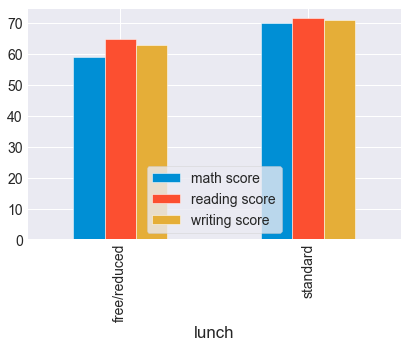

In [64]:
df.groupby(["lunch"]).mean().plot.bar()
plt.show()

* **la majorité des étudiants prennent le déjeuner standard, ce dernier affecte peut être leurs résultats**

<html>
    <p style='background:white; color:#1F4E79; font-size:20px; padding:10px;border:5px #1F4E79 solid'><b>Les notes selon la catégorie sociale </b></p>
</html>

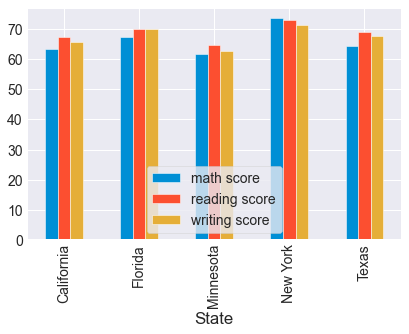

In [65]:
df.groupby(["State"]).mean().plot.bar()
plt.show()

* **Les étudiants qui habite à New York ont des notes plus élevées**

<html>
    <p style='background:#1F4E79; color:#ED7D31; font-size:20px; padding:10px;'><b>PRIDECTION DE LA PERFORMANCE</b></p>
</html>

<html>
    <p style='background:white; color:#1F4E79; font-size:20px; padding:10px;border:5px #1F4E79 solid'><b>Création de nouveaux features  </b></p>
</html>

* **Puisque les trois scores sont corrélés entre eux, il vaut mieux les fusionner en un seul score définissant clairement la performance des étudiants**
* **Nous avons décidé alors par la suite de ne considérer que le nouveau score, les moyenne des 3 scores**

In [66]:
df['score']= ((df["math score"] + df["reading score"] + df["writing score"])/3).round()
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,State,score
0,female,bachelor's degree,standard,none,NaN,72.0,74.0,California,NaN
1,female,some college,standard,completed,69.0,90.0,88.0,Texas,82.0
2,female,master's degree,standard,none,90.0,95.0,93.0,California,93.0
3,male,associate's degree,free/reduced,none,47.0,57.0,44.0,Minnesota,49.0
4,male,some college,standard,none,76.0,78.0,75.0,Texas,76.0


<html>
    <p style='background:white; color:#1F4E79; font-size:20px; padding:10px;border:5px #1F4E79 solid'><b>Visualisation du score total selon les différents features  </b></p>
</html>

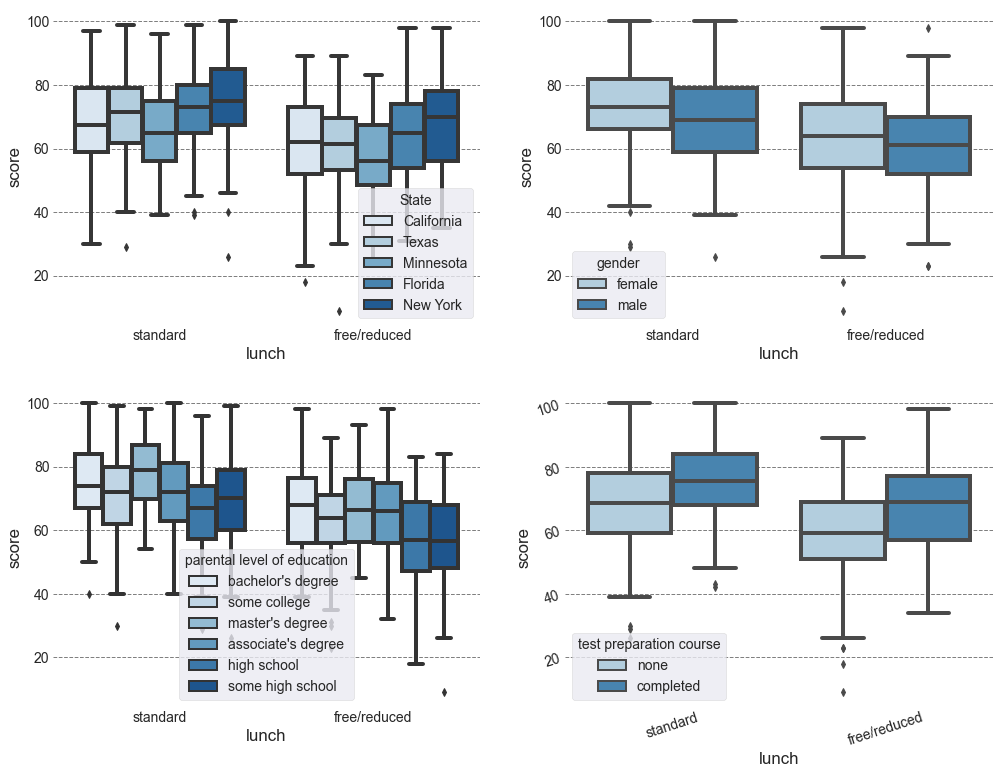

In [67]:
fig=plt.figure(figsize=(15,12))
grids=fig.add_gridspec(2,2)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])

axes=[ax00,ax01,ax10,ax11]
background_color=  "#ffffff"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

sns.boxplot(data=df,y='score',x="lunch",hue='State',palette='Blues',ax=ax00)
sns.boxplot(data=df,y='score',x='lunch',hue='gender',palette='Blues',ax=ax01)

sns.boxplot(data=df,y='score',x='lunch',hue='parental level of education',palette='Blues',ax=ax10)
sns.boxplot(data=df,y='score',x='lunch',hue='test preparation course',palette='Blues',ax=ax11)
ax11.tick_params(labelrotation=18)


description_plots=[ax00,ax01,ax10,ax11]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')

* les étudiants qui prennents un déjeuner standard, appartennant à New York state, Femmes, dont le niveau éducationnel parental est master, qui ont bien préparé bien sur :) **ont un score total supérieur**


<html>
    <p style='background:white; color:#ED7D31; font-size:20px; padding:10px;border:2px #ED7D31 solid'><b>Preprocessing </b></p>
</html>

## Outliers

ShapiroResult(statistic=nan, pvalue=1.0)


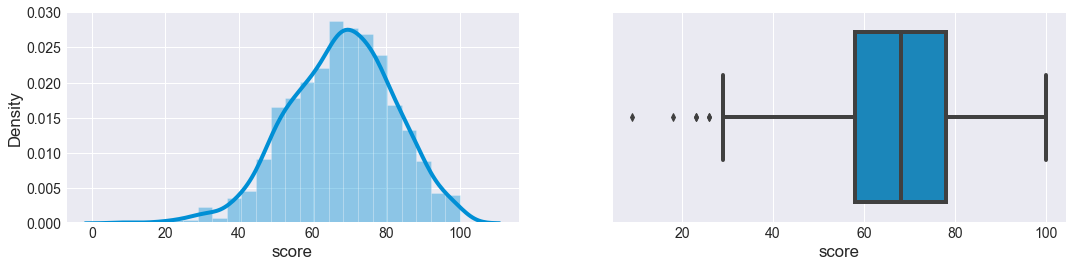

In [68]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['score'])

warnings.filterwarnings("ignore")

plt.subplot(2,2,2)
sns.boxplot(df['score'])
sp= stat.shapiro(df['score'])

print(sp)

* **on constate qu'on a des outliers dans la note moyenne qu'on va éliminer par la suite en utilisant la méthode d'interquartiles**
* **on remarque aussi que la distribution de la note moyenne ne suit pas la loi normale (P_value > 0.05)**

In [69]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 +1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df, "score")
print("Upper : ", upper)
print("Lower : ", lower)

Upper :  108.0
Lower :  28.0


In [70]:
df = df[(df['score'] > lower) & (df['score'] < upper)]

ShapiroResult(statistic=0.9950727224349976, pvalue=0.002704104408621788)


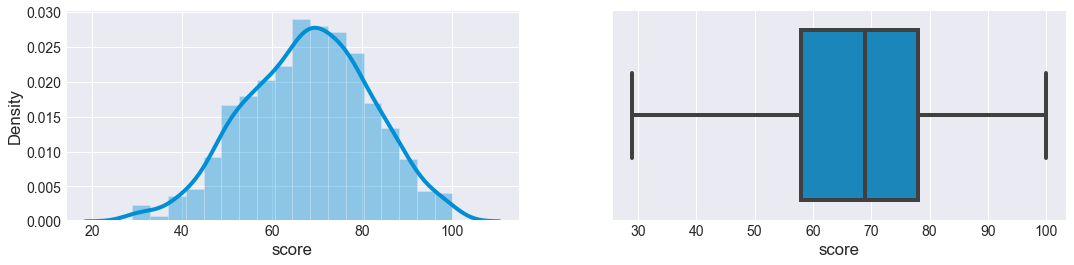

In [71]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['score'])

warnings.filterwarnings("ignore")
plt.subplot(2,2,2)
sns.boxplot(df['score'])
sp= stat.shapiro(df['score'])
print(sp)

* **Après avoir éliminer les outliers la distrubution devient normale**

In [72]:
df=df.drop(['math score','writing score','reading score'],axis=1)
df.head()

,gender,parental level of education,lunch,test preparation course,State,score
1,female,some college,standard,completed,Texas,82.0
2,female,master's degree,standard,none,California,93.0
3,male,associate's degree,free/reduced,none,Minnesota,49.0
4,male,some college,standard,none,Texas,76.0
5,female,associate's degree,standard,none,California,77.0


In [73]:
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['score'], dtype='object')
Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'State'],
      dtype='object')


## Missing Values

In [74]:
df['score'].fillna(df['score'].mean(), inplace=True)
df

,gender,parental level of education,lunch,test preparation course,State,score
1,female,some college,standard,completed,Texas,82.0
2,female,master's degree,standard,none,California,93.0
3,male,associate's degree,free/reduced,none,Minnesota,49.0
4,male,some college,standard,none,Texas,76.0
5,female,associate's degree,standard,none,California,77.0
...,...,...,...,...,...,...
995,female,master's degree,standard,completed,New York,94.0
996,male,high school,free/reduced,none,Texas,57.0
997,female,high school,free/reduced,completed,Texas,65.0
998,female,some college,standard,completed,Florida,74.0


In [75]:
cols = cat_vars.tolist()
for col in cols :
    df[col] = df[col].fillna(df[col].mode()[0])
df.isnull().sum()

gender                         0
parental level of education    0
lunch                          0
test preparation course        0
State                          0
score                          0
dtype: int64

In [76]:
df['gender']=df['gender'].map({'female':0 , 'male':1}).astype(int)
df['lunch']=df['lunch'].map({'standard':1 , 'free/reduced':0}).astype(int)
df['test preparation course']=df['test preparation course'].map({'none':0 , 'completed':1}).astype(int)
df 

,gender,parental level of education,lunch,test preparation course,State,score
1,0,some college,1,1,Texas,82.0
2,0,master's degree,1,0,California,93.0
3,1,associate's degree,0,0,Minnesota,49.0
4,1,some college,1,0,Texas,76.0
5,0,associate's degree,1,0,California,77.0
...,...,...,...,...,...,...
995,0,master's degree,1,1,New York,94.0
996,1,high school,0,0,Texas,57.0
997,0,high school,0,1,Texas,65.0
998,0,some college,1,1,Florida,74.0


* **On a remplacé les missing values des variables numériques par la moyenne et des variables catégorielles par le mode**

In [77]:
df = pd.get_dummies(df)
df

,gender,lunch,test preparation course,score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,State_California,State_Florida,State_Minnesota,State_New York,State_Texas
1,0,1,1,82.0,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,93.0,0,0,0,1,0,0,1,0,0,0,0
3,1,0,0,49.0,1,0,0,0,0,0,0,0,1,0,0
4,1,1,0,76.0,0,0,0,0,1,0,0,0,0,0,1
5,0,1,0,77.0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,94.0,0,0,0,1,0,0,0,0,0,1,0
996,1,0,0,57.0,0,0,1,0,0,0,0,0,0,0,1
997,0,0,1,65.0,0,0,1,0,0,0,0,0,0,0,1
998,0,1,1,74.0,0,0,0,0,1,0,0,1,0,0,0


**Pour des raisons de simplicité, c'est difficile d'entrainer un modéle de regression sur des attributs binaires, Alors on a transormer le probléme vers une classification binaire naive.**

In [78]:
df['score_bin'] = df['score'] >= 50
df['score_bin']=df['score_bin'].map({True:1 , False:0}).astype(int)
df = df.drop('score', axis = 1)

<html>
    <p style='background:white; color:#ED7D31; font-size:20px; padding:10px;border:2px #ED7D31 solid'><b>Importation des bibliothèques </b></p>
</html>

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [80]:
Y = df['score_bin']
X = df.drop('score_bin',axis=1)

<html>
    <p style='background:white; color:#ED7D31; font-size:20px; padding:10px;border:2px #ED7D31 solid'><b>Training </b></p>
</html>

In [81]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#### Random Forest Classifier Model

In [82]:
model_rfc = RandomForestClassifier()
model_rfc.fit(x_train,y_train)

RandomForestClassifier()

#### SVM model

In [83]:
model_svm = SVC()
model_svm.fit(x_train,y_train)

SVC()

<html>
    <p style='background:white; color:#ED7D31; font-size:20px; padding:10px;border:2px #ED7D31 solid'><b> Importance des features </b></p>
</html>

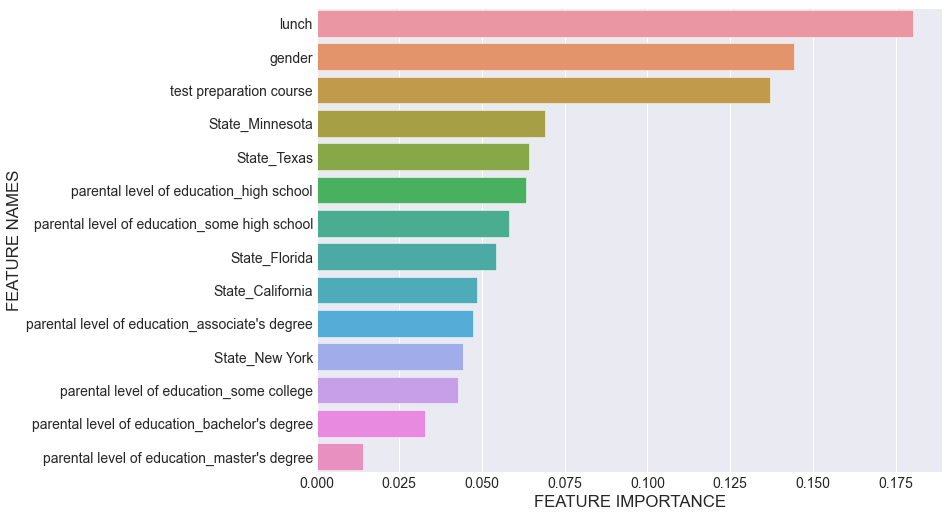

In [84]:
feature_importance = np.array(model_rfc.feature_importances_)
feature_names = np.array(x_train.columns)

data={'feature_names' : feature_names, 'feature_importance' : feature_importance}
df_plt = pd.DataFrame(data)
df_plt.sort_values(by = ['feature_importance'], ascending = False, inplace = True)
plt.figure(figsize=(10,8))

sns.barplot(x = df_plt['feature_importance'], y = df_plt['feature_names'])
plt.style.use("fivethirtyeight")
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

plt.show()

* **On remarque pour notre modèle : "type de déjeuner", "test préparation" et "le genre" sont les 3 premier features les plus importants pur un seuil de "0.07".**

### Evaluation and Model Quality

<span style = "color : darkorange; font-size : 15px; font-weight : bold;">Random Forest Classifier</span>

In [85]:
y_pred = model_rfc.predict(x_test)

Model Quality : 
Accuracy=  85.35353535353535


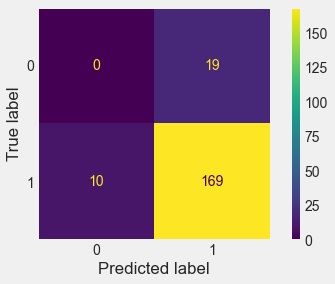

In [86]:
accuracy = accuracy_score(y_pred, y_test)
print('Model Quality : \nAccuracy= ',accuracy*100)
plot_confusion_matrix(model_rfc, x_test, y_test)
plt.grid()
plt.show()

<span style = "color : darkorange; font-size : 15px; font-weight : bold;">SVM</span>

In [87]:
y_pred = model_svm.predict(x_test)

Model Quality : 
Accuracy=  90.40404040404042


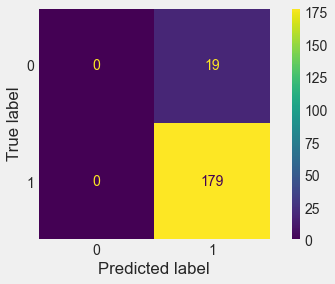

In [88]:
accuracy = accuracy_score(y_pred, y_test)
print('Model Quality : \nAccuracy= ',accuracy*100)
plot_confusion_matrix(model_svm, x_test, y_test)
plt.grid()
plt.show()

**Le modèle VSM est plus puissant que RFC dans la détection des 'TP'.** [True Positives] <br>
***-Remarque : Specifity is null because the target value is not equaly distributed .. translation please :)*** [plot below]

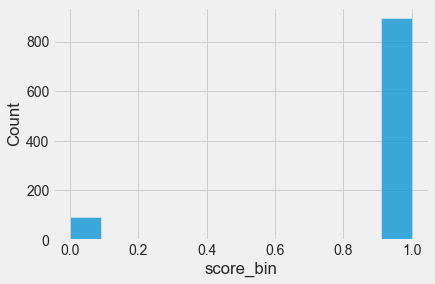

In [89]:
sns.histplot(df['score_bin'])
plt.show()

<span style = "color : green; font-size : 15px; font-weight : bold;">Simple test :</span>

In [90]:
output = model_svm.predict([[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])
if output == 1 : out_tr = 'Succeed'
else : out_tr = 'Not Succeed'
out_tr

'Succeed'

<html>
    <p style='background:white; color:#ED7D31; font-size:20px; padding:10px;border:2px #ED7D31 solid'><b> Enregistrement du modèle </b></p>
</html>

In [91]:
import pickle

<span style= "color : darkorange; font-size : 15px; font-weight : bold;">SVM</span>

In [92]:
filename = "ModelSVM-StdPerformance.sav"
pickle.dump(model_svm,open(filename,'wb'))

<span style= "color : darkorange; font-size : 15px; font-weight : bold;">Random Forest Classifier</span>

In [93]:
filename = "ModelRFC-StdPerformance.sav"
pickle.dump(model_rfc,open(filename,'wb'))